In [23]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
import utils
import logging
utils.level = logging.WARN
# enabling debug logging causes lag.

In [1]:
# from importlib import reload
import vehicles
import game as game_
import agents
import evaluation

engine = evaluation.Evaluator(
    attacker=agents.BasicAttackerAgent(),
    defender=agents.BasicDefenderAgent(),
    vehicles=vehicles.JsonVehicleProvider("../subgame/python/solutions.json"),
    num_vehicles=10,
    num_rounds=100
)

In [2]:
engine.run()

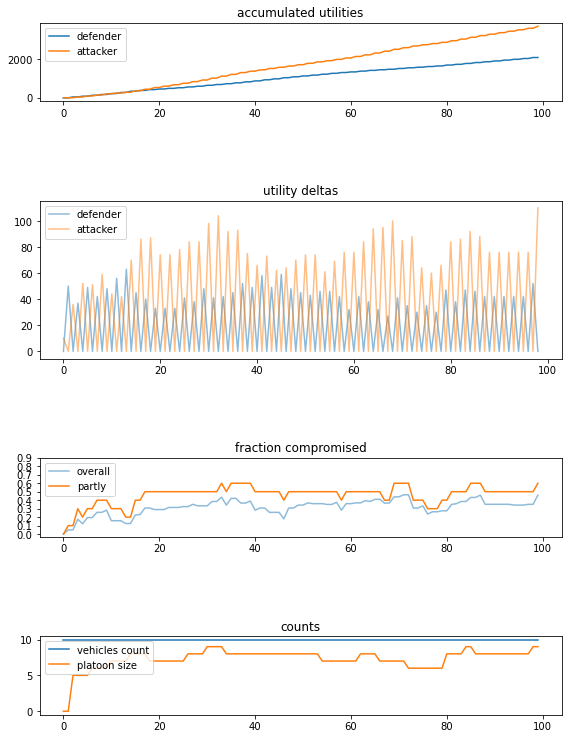

In [3]:
engine.plot()